| <h1> Prelim Examination </h1> | |
|--- | --- |
Name: Maglalang, Charles Lester : Nicolas, Sean Julian<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard <br>
Date Performed: March 02, 2024 <br>
Date Submitted: March 06, 2024 <br>

<hr>

## Instructions:

Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

- Linear Regression
  - Singular LR
  - Multiple LR
  - Polynomial LR
- Logistic Regression
- Decision Tree
- Random Forest

Provide Evaluation reports for all models


---



### Import Libraries and Connect GDrive

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score as score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

!git clone "https://github.com/SeanNicolas/CPE019.git"

fatal: destination path 'CPE019' already exists and is not an empty directory.


In [28]:
def convertStrNum(col, dataset):
  le = LabelEncoder()
  dataset[col]= le.fit_transform(dataset[col])

In [29]:
def importdata(path):
  dataset = pd.read_csv(path)
  return dataset

In [30]:
ins = importdata('/content/CPE019/Prelim Exam/insurance.csv')

In [31]:
convertStrNum("smoker", ins)
convertStrNum("sex", ins)
convertStrNum("region", ins)

<Axes: >

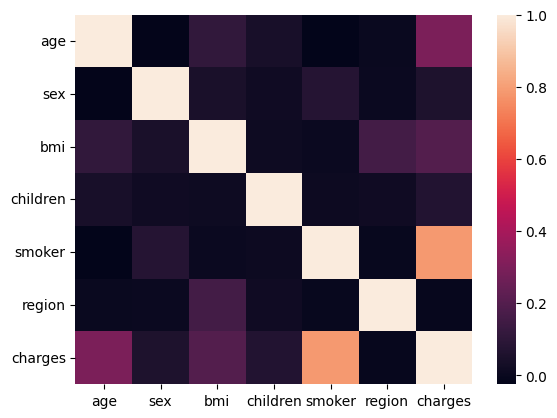

In [32]:
sns.heatmap(ins.corr())

### Singular Linear Regression

In [33]:
def SingleLR(X, y, dataset):
    # Extract features (X) and target variable (y) from the dataset
    X = dataset[X].values.reshape(-1,1)
    y = dataset[y].values.reshape(-1,1)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

    # Initialize another Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate
    print("R-squared:", score(y_test, y_pred))
    print("Model Score:", model.score(X_train, y_train))
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color = 'red')
    plt.xlabel("Smoker")
    plt.ylabel("Charges")

R-squared: 0.6695926965495695
Model Score: 0.5900435676857526


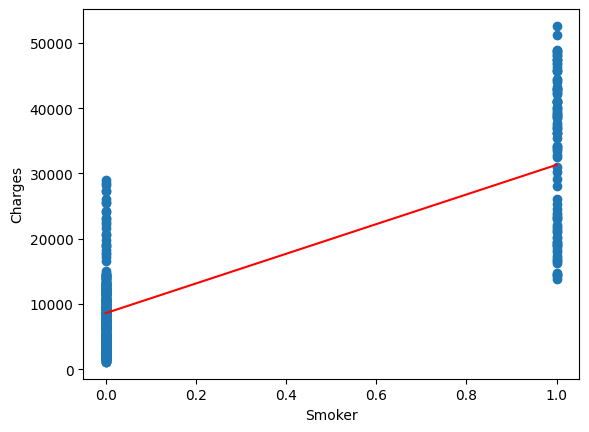

In [34]:
SingleLR("smoker", "charges", ins)

### Multiple Linear Regression

In [35]:
def MultipleLR(X, y, dataset):
    # Extract features (X) and target variable (y) from the dataset
    X = dataset[X].values
    y = dataset[y].values.reshape(-1)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

    # Initialize another Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate
    print("R-squared:", score(y_test, y_pred))
    print("Model Score:", model.score(X_train, y_train))

    # Create a meshgrid for 3D plotting
    x_mesh, y_mesh = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), 100), np.linspace(min(X[:,1]), max(X[:,1]), 100))
    z_mesh = model.predict(np.array([x_mesh.ravel(), y_mesh.ravel()]).T).reshape(x_mesh.shape)

    # Plotting 3D model
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_test[:,0], X_test[:,1], y_test, color='black', label='Actual Data')
    ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5,cmap = 'copper_r',label='Regression Plane', antialiased=False, shade = True)
    ax.view_init(0, 30)
    ax.set_xlabel('Age')
    ax.set_ylabel('Smoker')
    ax.set_zlabel('Charges')
    ax.set_title('Multiple Linear Regression')


    plt.show()

    # Plot predicted vs actual values
    sns.scatterplot(x=y_test, y=y_pred, c = 'blue')
    sns.regplot(x=y_test, y=y_pred, color = 'red', scatter = False)
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.title("Actual vs Predicted")

R-squared: 0.7601498832298486
Model Score: 0.6985324703760613


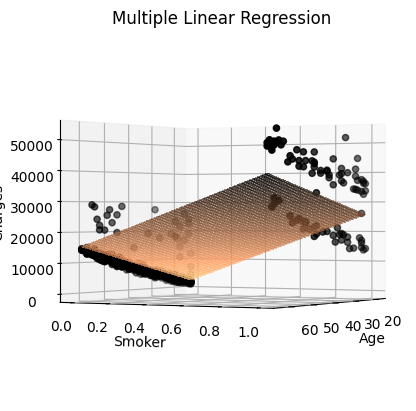

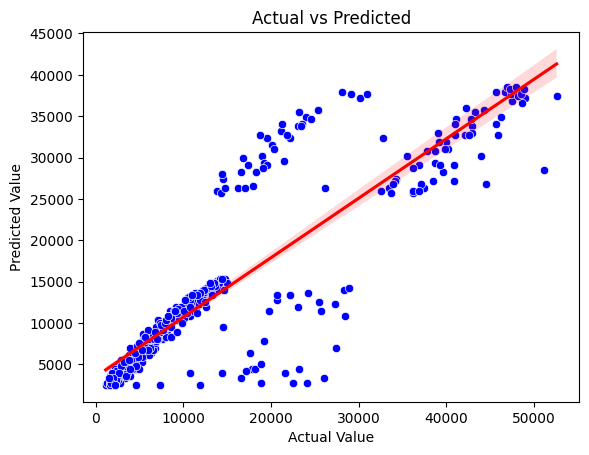

In [36]:
MultipleLR(["age", "smoker"], "charges", ins)

### Polynomial Linear Regression

In [37]:
def PolyLR(X, y, dataset):
    # Extract features (X) and target variable (y) from the dataset
    X = dataset[X].values.reshape(-1)
    y = dataset[y].values.reshape(-1)

    poly = np.polyfit(X, y, 5)
    model = np.poly1d(poly)

    X1 = np.linspace(1,10,100)
    y1 = model(X1)

    plt.plot(X, y,'.',  X1, y1)
    plt.xlabel("Smoker")
    plt.ylabel("Charges")
    plt.title("Polynomial Linear Regression")

    plt.show()


<ipython-input-37-480a4debeea1>:6: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(X, y, 5)


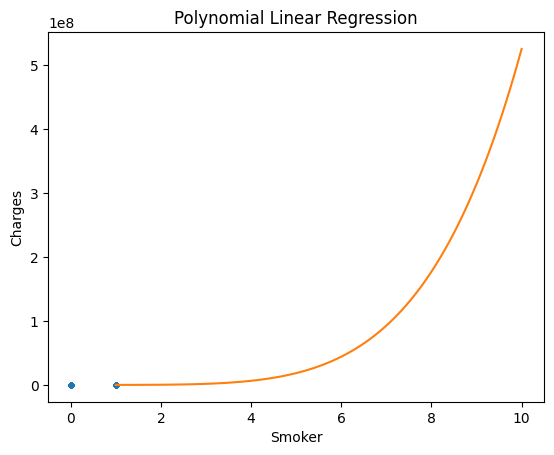

In [38]:
PolyLR("smoker", "charges", ins)

### Logistic Regression

In [39]:
def LogisticR(X, y, dataset):
    # Extract x and y variables from dataset and reshape feature and target variables
    X = dataset[X].values.reshape(-1,1)
    y = dataset[y].values.reshape(-1)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # Initialize a Logistic Regression model
    model = LogisticRegression(max_iter=40)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plot to visualize
    sns.regplot(x = X_test, y = y_test, logistic= True)
    plt.xlabel("Charges")
    plt.ylabel("Smoker")
    plt.title("Logistic Regression")
    plt.show()
    sns.regplot(x = y_test, y = y_pred, logistic= True)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.show()
    # Calculate the accuracy of the model
    print(classification_report(y_test, y_pred))

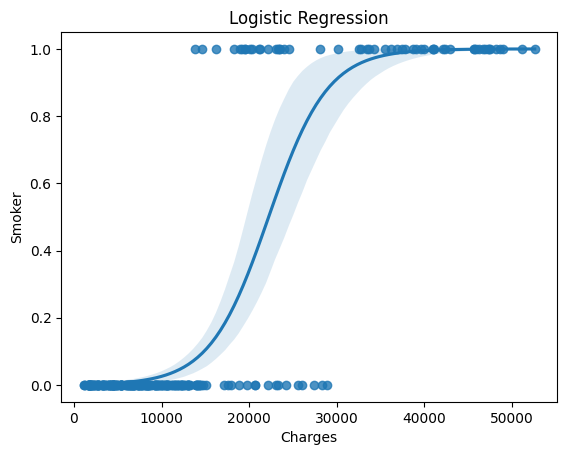

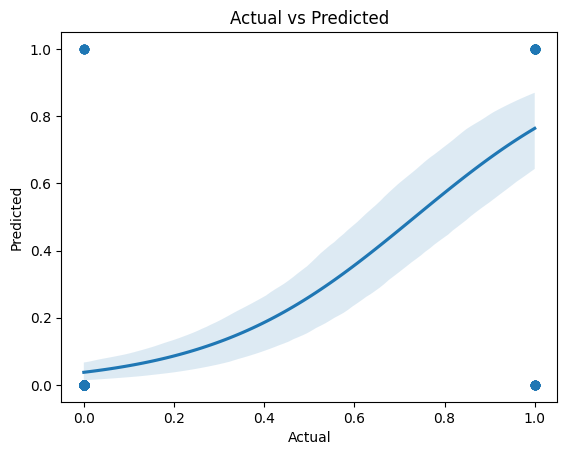

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       213
           1       0.84      0.76      0.80        55

    accuracy                           0.92       268
   macro avg       0.89      0.86      0.88       268
weighted avg       0.92      0.92      0.92       268



In [40]:
LogisticR("charges", "smoker", ins)

### Decision Tree

In [41]:
def DecisionT(X,y,dataset):
  # values for independent and dependent variables
  X = dataset[X].values
  y = dataset[y].values.reshape(-1)

  # split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = False)

  #Initialize the Decision tree model
  dtree = DecisionTreeClassifier(criterion = 'entropy')

  # train the model
  dtree.fit(X_train, y_train)

  y_pred = dtree.predict(X_test)

  # Evaluation
  print(classification_report(y_test, y_pred, zero_division=True))
  print("Accuracy:",accuracy_score(y_test, y_pred))

  # Plot
  plt.figure(figsize=(40, 30))
  plot_tree(dtree, fontsize = 10, feature_names= ("age", "sex", "bmi", "charges"))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       318
           1       0.92      0.86      0.89        84

    accuracy                           0.96       402
   macro avg       0.94      0.92      0.93       402
weighted avg       0.95      0.96      0.95       402

Accuracy: 0.9552238805970149


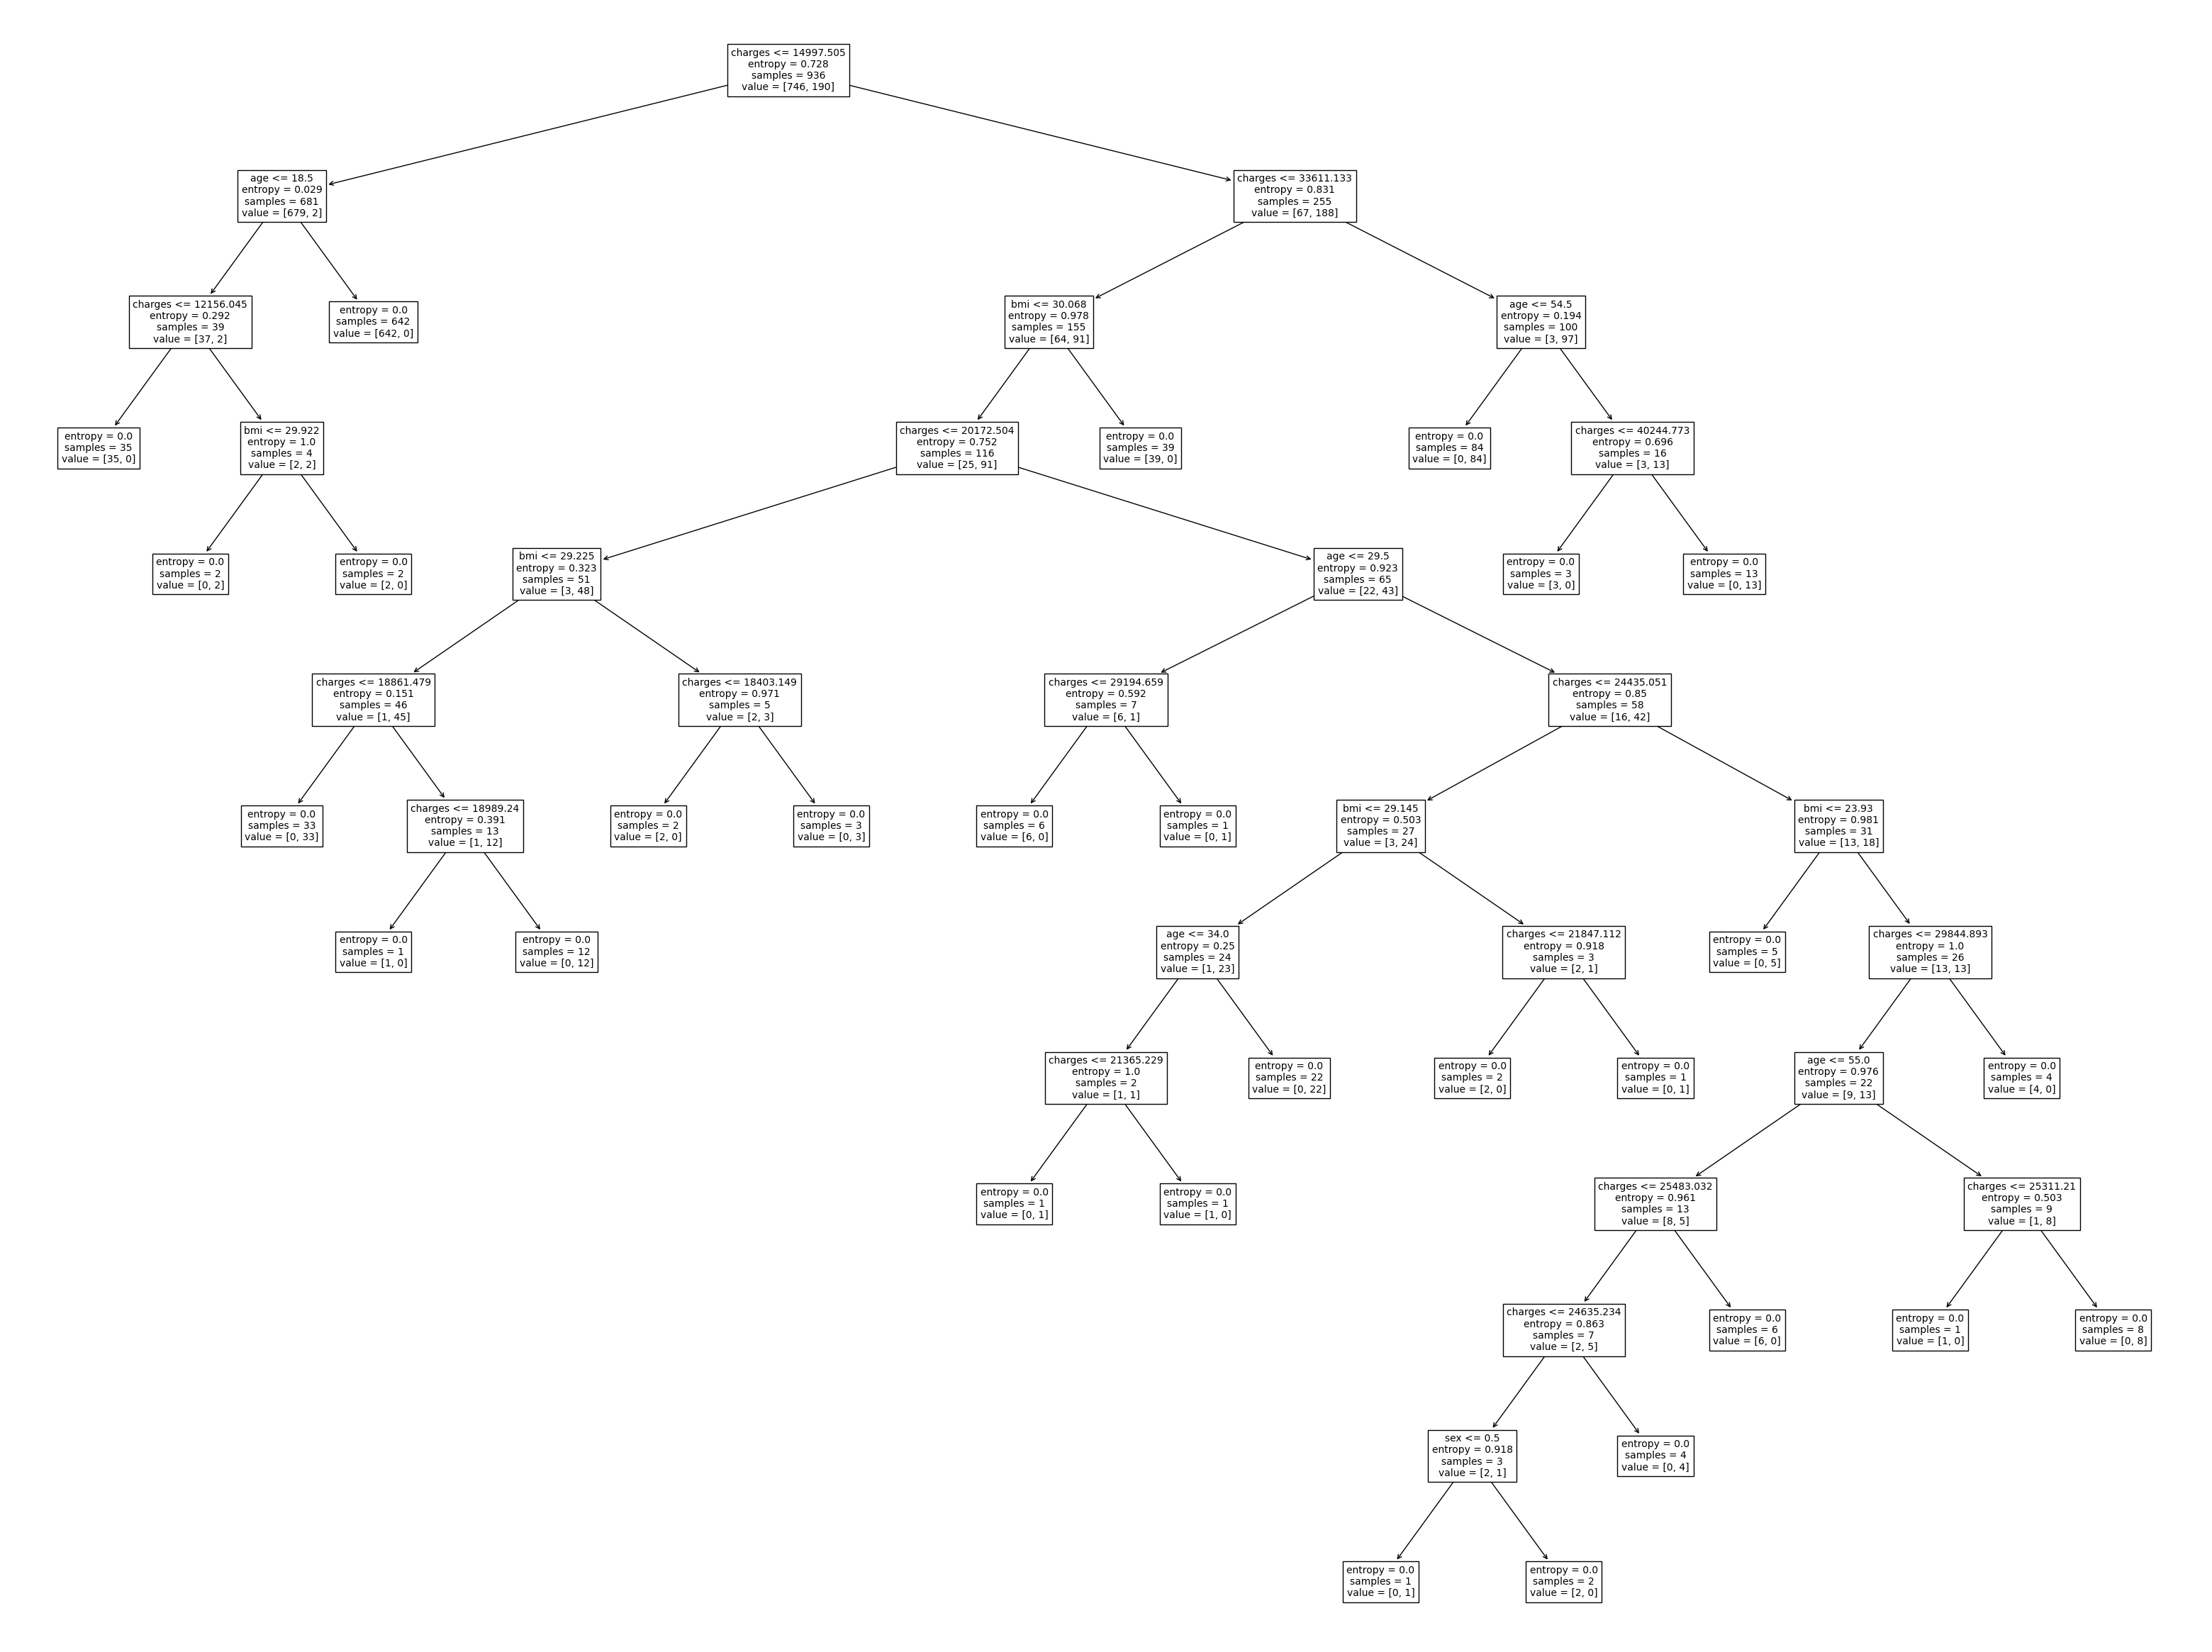

In [42]:
DecisionT([ "age", "sex", "bmi", "charges"],"smoker",ins)

### Random Forest

In [43]:
def RandomF(X,y,dataset):
  # Extract features (X) and target variable (y) from the dataset
  X = dataset[X].values
  y = dataset[y].values.reshape(-1)

  # Split dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = False)

  # Feature scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Initialize a Random Forest Regressor model
  regressor = RandomForestClassifier(n_estimators=2, random_state=0, criterion="entropy")

  # Train the Random Forest Regressor model on the training data
  regressor.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = regressor.predict(X_test)

  # Extract a decision tree from the Random Forest for visualization
  tree_to_plot = regressor.estimators_[1]

  # Plot the decision tree
  plt.figure(figsize=(30, 20))
  plot_tree(tree_to_plot, rounded=True, fontsize=10, feature_names= ("age", "sex", "bmi", "charges"))
  plt.title("Number of Smokers per Region")

  # Calculate the accuracy of the model
  print(classification_report(y_test, y_pred, zero_division=True))
  print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       318
           1       0.92      0.77      0.84        84

    accuracy                           0.94       402
   macro avg       0.93      0.88      0.90       402
weighted avg       0.94      0.94      0.94       402

Accuracy: 0.9378109452736318


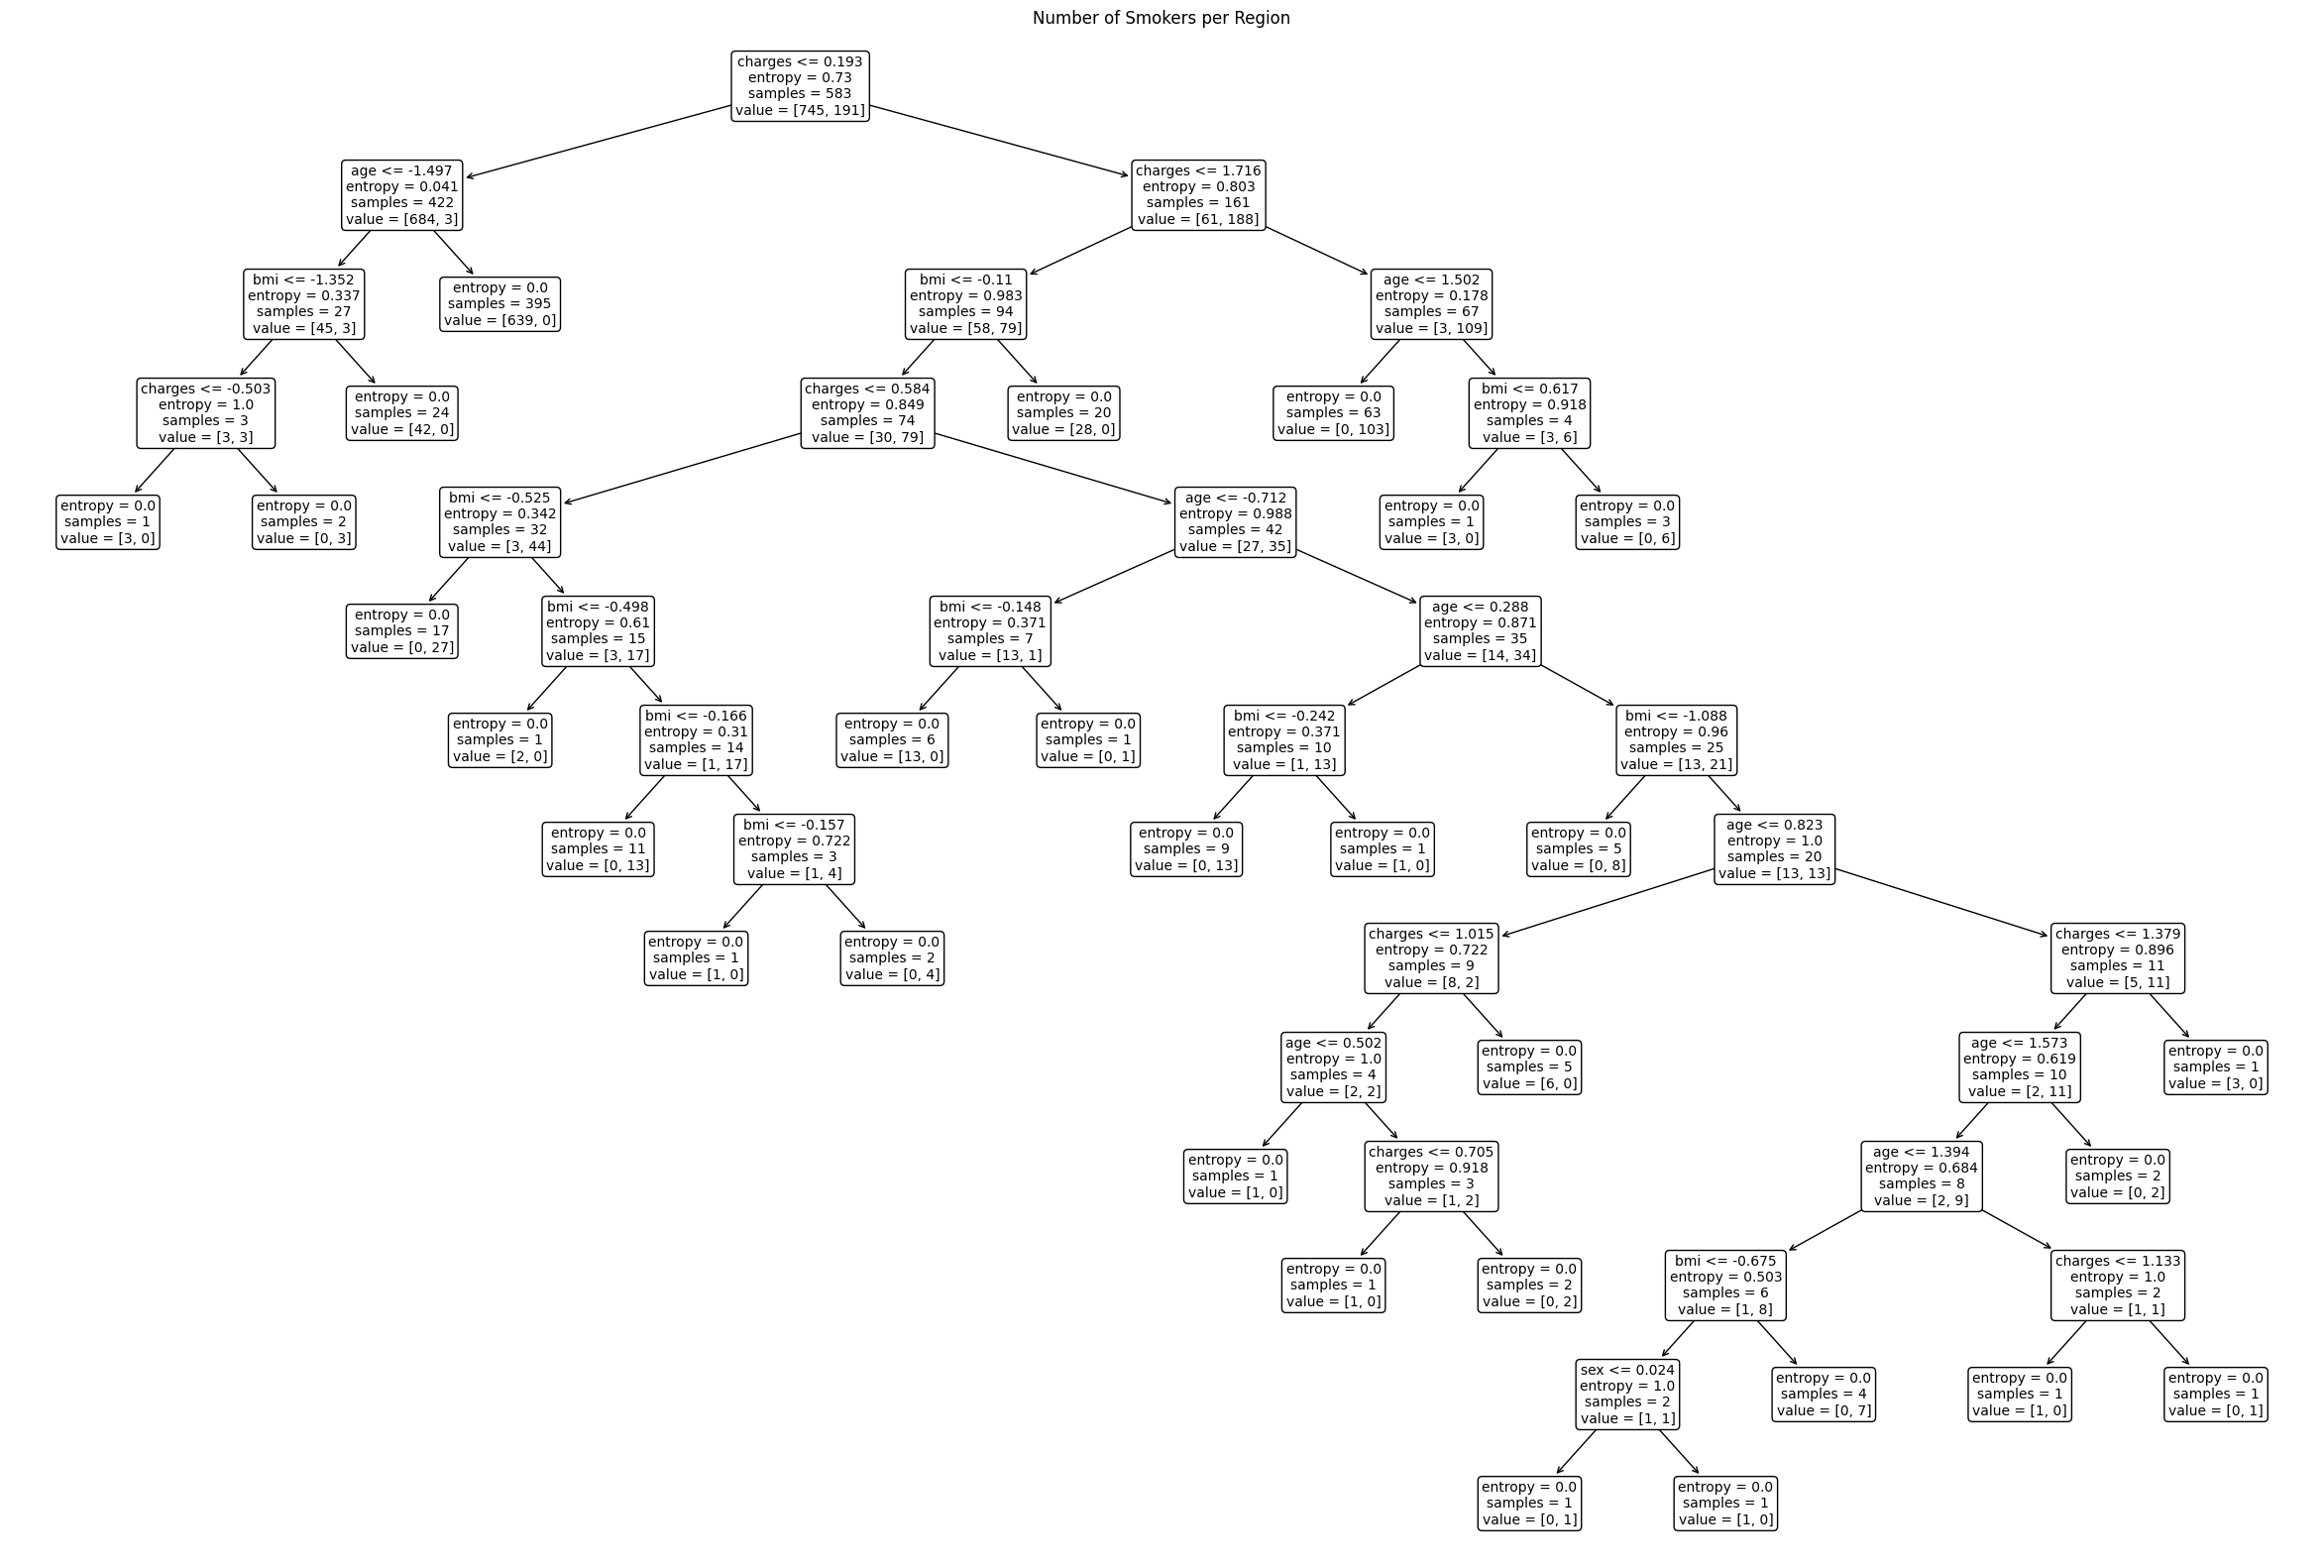

In [44]:
RandomF(["age", "sex", "bmi", "charges"], "smoker", ins)